In [1]:
import pandas as pd
import os

In [2]:
# Path to the directory containing your CSV files
directory_path = 'C:/Data Science/data/raw/Youtube'

# Initialize an empty DataFrame to hold all the merged data
merged_df = pd.DataFrame()

In [93]:
# Loop through each file in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory_path, file_name)
        
        # Read the CSV file into a DataFrame
        temp_df = pd.read_csv(file_path)
        
        # Extract part of the file name to use as the FileID (e.g., the search term)
        # Assuming the file name format is "searchterm_youtube.csv"
        file_id = file_name.split('_youtube.csv')[0]
        
        # Add the FileID as a new column to the DataFrame
        temp_df['FileID'] = file_id
        
        # Append the temp DataFrame to the merged DataFrame
        merged_df = pd.concat([merged_df, temp_df], ignore_index=True)

# Now merged_df contains all your data with an additional 'FileID' column

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123760 entries, 0 to 123759
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                123760 non-null  object 
 1   Title             123760 non-null  object 
 2   Author            123760 non-null  object 
 3   Date Uploaded     123760 non-null  object 
 4   Views             123760 non-null  int64  
 5   Likes_x           121655 non-null  float64
 6   Subscriber Count  118956 non-null  float64
 7   Country           123649 non-null  object 
 8   Comment           123646 non-null  object 
 9   Likes_y           123648 non-null  float64
 10  AuthorChannelId   123648 non-null  object 
 11  PublishedAt       123648 non-null  object 
 12  FileID            123760 non-null  object 
 13  VideoID           106764 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 13.2+ MB


In [95]:
merged_df = merged_df.drop(columns="VideoID")


In [96]:
import emoji

def clean_text(text):
    if not isinstance(text, str):
        return ''  # Return empty string for non-string inputs
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Handling contractions left as previously described
    # Use the emoji library to detect and preserve emojis
    text_with_emojis = ''.join(char if char in emoji.UNICODE_EMOJI['en'] else ' ' for char in text)
    # The rest of the cleaning process as before, applied to text_with_emojis
    # Note: Depending on how you want to handle spaces and tokens, further adjustments might be needed
    return text_with_emojis


In [97]:
import re
import nltk
from nltk.corpus import stopwords
import emoji

nltk.download('stopwords')

def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters, preserving emojis
    # The strategy here is to remove characters that are not words, spaces, or emojis
    text = ''.join(char for char in text if char.isalnum() or char.isspace() or emoji.is_emoji(char))
    
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    text = ' '.join(filtered_words)
    return text



# Clean the 'Title' and 'Comment' columns
# Note: For demonstration, using the DataFrame from the initial CSV load as merged_df not created in this environment
merged_df['Title_Cleaned'] = merged_df['Title'].apply(clean_text)
merged_df['Comment_Cleaned'] = merged_df['Comment'].apply(clean_text)

# Display the cleaned text of the first few rows to verify the cleaning
merged_df[['Title_Cleaned', 'Comment_Cleaned']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Title_Cleaned,Comment_Cleaned
0,rtx 3090 ti vs power supply,thank watching video enjoyed please hit like b...
1,rtx 3090 ti vs power supply,literally would need mount f nuclear reactor 5...
2,rtx 3090 ti vs power supply,point would make sense power inlet directly gp...
3,rtx 3090 ti vs power supply,fyi 1500 watts max continuous load north ameri...
4,rtx 3090 ti vs power supply,550w power supply like still suffer


In [ ]:
# Run the polarity score on the entire dataset
res ={}
for i, row in merged_df(df.iterows(), total=len(df)):
    TitleC = row['Title_Cleaned']
    CommentsC = row['Comments_Cleaned']
    res[myid]

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER's SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis
merged_df['Title_Sentiment'] = merged_df['Title_Cleaned'].apply(get_sentiment)
merged_df['Comment_Sentiment'] = merged_df['Comment_Cleaned'].apply(get_sentiment)

# This will add two new columns with sentiment analysis results as dictionaries


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aadon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: 'Title_Cleaned'

In [38]:
merged_df.to_csv("C:\Data Science\data\processed\Youtube\Main.csv")

In [3]:
merged_df= pd.read_csv("C:\Data Science\data\processed\Youtube\Main.csv")

In [91]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247520 entries, 0 to 247519
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         247520 non-null  int64  
 1   ID                 247520 non-null  object 
 2   Title              247520 non-null  object 
 3   Author             247520 non-null  object 
 4   Date Uploaded      247520 non-null  object 
 5   Views              247520 non-null  int64  
 6   Likes_x            243310 non-null  float64
 7   Subscriber Count   237912 non-null  float64
 8   Country            247298 non-null  object 
 9   Comment            247292 non-null  object 
 10  Likes_y            247296 non-null  float64
 11  AuthorChannelId    247296 non-null  object 
 12  PublishedAt        247296 non-null  object 
 13  FileID             247520 non-null  object 
 14  Title_Cleaned      247520 non-null  object 
 15  Comment_Cleaned    247176 non-null  object 
 16  Ti

In [43]:
merged_df["FileID"].unique()

array(['3090', '4090', 'AGI', 'AMD', 'Andrew Tate', 'Antisemetism_',
       'Apple', 'Arsenal', 'Ben Shapiro', 'Biden', 'Bitcoin',
       'Candace Owens', 'Charles Leclerc', 'China', 'Christianity', 'cls',
       'Copilot', 'Crypto', 'Data Science', 'Extremism', 'FC Porto',
       'Ford', 'Gaza', 'Intel', 'iphone', 'Islamophobia', 'islam',
       'Israel', 'Jordan Peterson', 'Judaism', 'Justin Trudeau',
       'Kier Starmer', 'Labour', 'Lewis Hamilton', 'Liverpool FC',
       'Manchester United', 'Max Verstapen', 'Mercedes', 'Michael Gove',
       'Microsoft', 'Mike Tyson', 'Netanyahu', 'Nvidia', 'Open AI',
       'Pixel 8', 'Putin', 'Rishi Sunak', 'Sadiq Khan', 'Samsung S24',
       'Samsung', 'Sora', 'Tesla', 'Tories', 'Trump', 'xAI Grok'],
      dtype=object)

In [98]:
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'show'

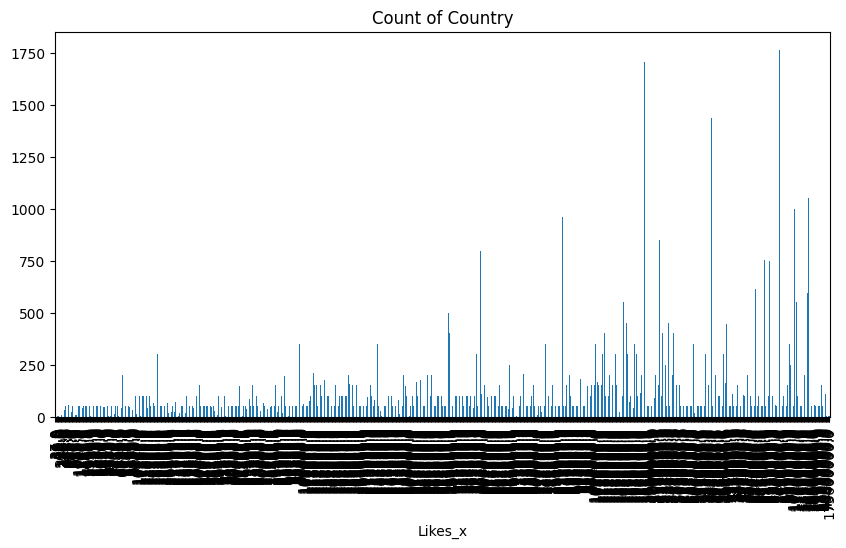

In [103]:
ax = merged_df['Subscriber Count'].value_counts().sort_index() \
    .plot(kind='bar',
    title='Count of Country',
    figsize=(10,5))
ax.set_xlabel('Likes_x')
plt.show()

In [ ]:
gpu = ['3090', '4090']
ai = ['AGI',  'Open AI', 'xAI Grok', 'Copilot','Sora']
inf = ['Andrew Tate', 'Ben Shapiro', 'Candace Owens','Candace Owens','Jordan Peterson'] 
rscm = ['Antisemetism_', 'Islamophobia','Extremism']
['Apple','Samsung']
phone = ['Pixel 8', 'iphone', 'Samsung S24']
pc = ['AMD', 'Nvidia', 'Intel', 'Microsoft']
relig = ['Christianity','islam','Judaism']
leaders = ['Justin Trudeau', 'Kier Starmer','Biden', 'Michael Gove', 'Rishi Sunak', 'Sadiq Khan','Netanyahu', 'Putin',]
uk = ['Labour', 'Tories']
ig = ['Israel','Gaza']
footy = ['Arsenal', 'Liverpool FC', 'FC Porto','Manchester United']
f1 = ['Max Verstapen','Charles Leclerc', 'Lewis Hamilton']
btc = ['Bitcoin','Crypto']
whips = ['Ford', 'Tesla', 'Mercedes'] 
'China',
'Data Science'           
'Mike Tyson'
